# Classifiers in scikit-learn

We're going to try out the classifier basic in scikit-learn.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification, make_hastie_10_2

# Get some ways of evaluating models
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
import numpy as np

## Visualizing decision boundaries

I'm going to use the make_hastie_10_2() dataset because I know it has non-linear decision boundary.

The dataset comes with 10 features, so I'll reduce it to 2 in order to make graphing easy.

In [2]:
X, y = make_hastie_10_2()
X = X[:500,0:2]
y = np.array(y)[:500]
print(X.shape)
print(y.shape)

(500, 2)
(500,)


Here is what the data looks like.

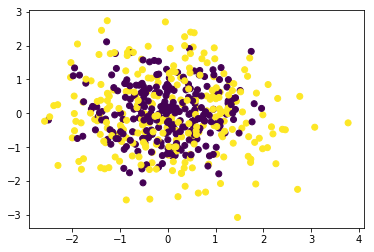

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)

plt.show()

It appears that we have an egg-yolk dataset. I have a suspicion that the logistic regression will not work well with this.

Let's try it anyways.

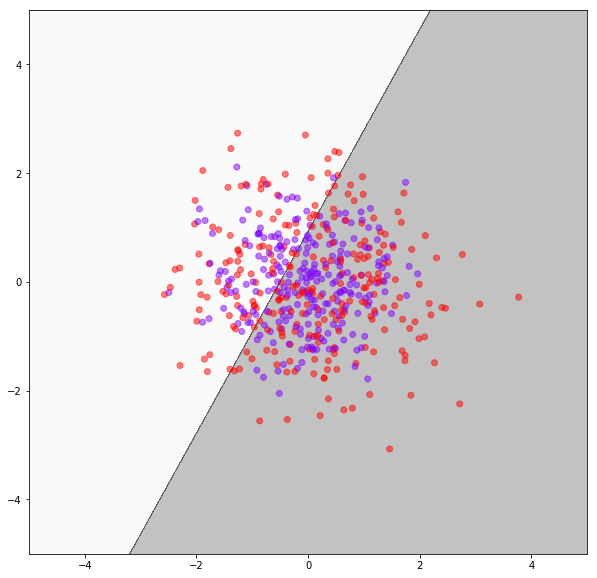

accuracy : 0.486
             precision    recall  f1-score   support

       -1.0       0.46      0.31      0.37       244
        1.0       0.50      0.66      0.57       256

avg / total       0.48      0.49      0.47       500



In [4]:
log = LogisticRegression()

log_fit = log.fit(X, y)

log_predict = log.predict(X)

plt.figure(figsize=(10, 10))
xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.005), 
                        np.arange(-5, 5, 0.005))
Z = log.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
out = plt.contourf(xx1, xx2, Z, cmap=plt.cm.binary, alpha=0.25)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.rainbow, alpha=0.5)
plt.show()

print("accuracy : {0}".format(accuracy_score(y, log_predict)))
print(classification_report(y, log_predict))

I remember from my Andrew Ng course that you can get a circular decision boundary with $x^2$ and $y^2$. Let's try that.

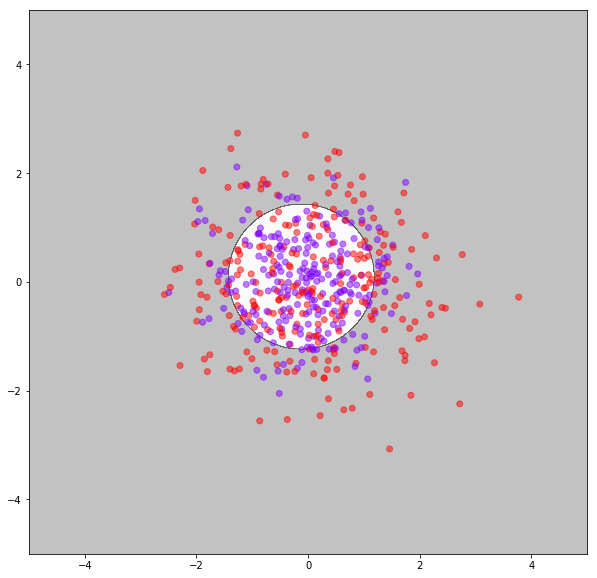

accuracy : 0.622
             precision    recall  f1-score   support

       -1.0       0.60      0.70      0.65       244
        1.0       0.66      0.54      0.60       256

avg / total       0.63      0.62      0.62       500



In [5]:
log = LogisticRegression()

log_fit = log.fit(np.concatenate((X, X**2), axis=1), y)

log_predict = log.predict(np.concatenate((X, X**2), axis=1))

plt.figure(figsize=(10, 10))
xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.005), 
                        np.arange(-5, 5, 0.005))
Z = log.predict(np.c_[xx1.ravel(), xx2.ravel(), xx1.ravel()**2, xx2.ravel()**2])
Z = Z.reshape(xx1.shape)
out = plt.contourf(xx1, xx2, Z, cmap=plt.cm.binary, alpha=0.25)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.rainbow, alpha=0.5)
plt.show()

print("accuracy : {0}".format(accuracy_score(y, log_predict)))
print(classification_report(y, log_predict))

## Logistic regression with a simpler dataset

I will try a simpler dataset. I am going to use the example from [this example](scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html), except with 0.25 `class_sep` because I want a more difficult task.

In [6]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1, 
                          class_sep=0.25)
print(X[:10,:])
print(y[:10])

[[-0.29948638  0.1286438 ]
 [ 0.1280991   0.14551051]
 [ 0.20928819  0.28967316]
 [-0.43013412  0.37062155]
 [-0.15731836  0.31040861]
 [ 0.12245374  0.62661405]
 [ 0.07178321  0.43947778]
 [-0.45376927  0.03801845]
 [ 0.02151441 -0.404284  ]
 [ 0.256143    0.91752297]]
[1 0 0 1 1 1 0 1 0 1]


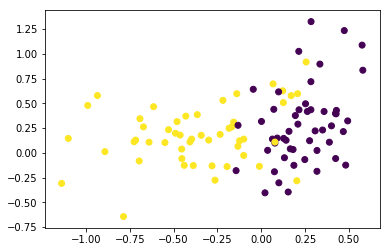

In [7]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

Nice! This should be a lot better.

In [8]:
log = LogisticRegression()

log_fit = log.fit(X, y)

log_predict = log.predict(X)

print("accuracy : {0}".format(accuracy_score(y, log_predict)))
print(classification_report(y, log_predict))

accuracy : 0.88
             precision    recall  f1-score   support

          0       0.84      0.94      0.89        50
          1       0.93      0.82      0.87        50

avg / total       0.89      0.88      0.88       100



Plotting the decision boundary is a bit tricky. It's similar to plotting a line by generating a uniform interval of values to graph through a function/model.

`np.arrange()` creates a uniform interval of value, and `np.meshgrids` combines the two of these into coordinates.